<a href="https://colab.research.google.com/github/olupy/ml-models/blob/main/pm_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving JanData.xlsx to JanData (1).xlsx
Epoch 1/100
56/56 [==============================] - 1s 6ms/step - loss: 46707.0039 - val_loss: 50260.4961
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 44372.8320 - val_loss: 45789.7812
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 37659.7891 - val_loss: 36119.8984
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 27748.0117 - val_loss: 25984.6426
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 20241.0020 - val_loss: 20271.5176
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 16804.4316 - val_loss: 17917.9727
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 15458.6357 - val_loss: 16805.2285
Epoch 8/100
56/56 [==============================] - 0s 3ms/step - loss: 14691.5469 - val_loss: 16046.7607
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 14142.6123 - val_loss: 15480.69

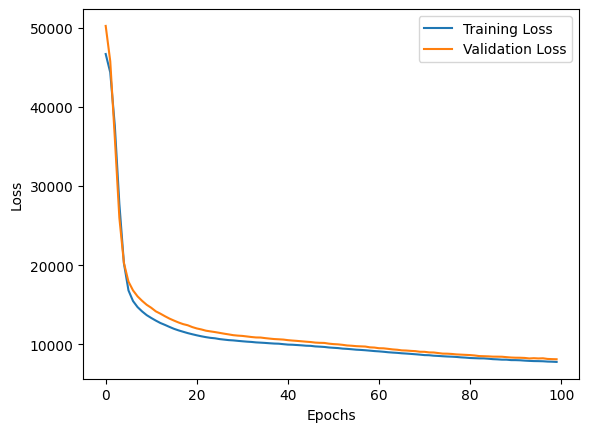

14/14 [==============================] - 0s 2ms/step


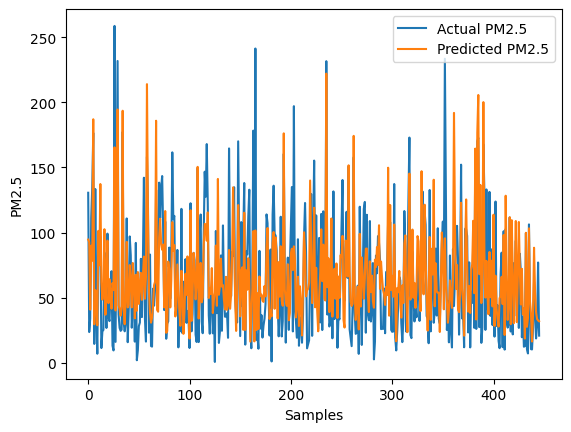

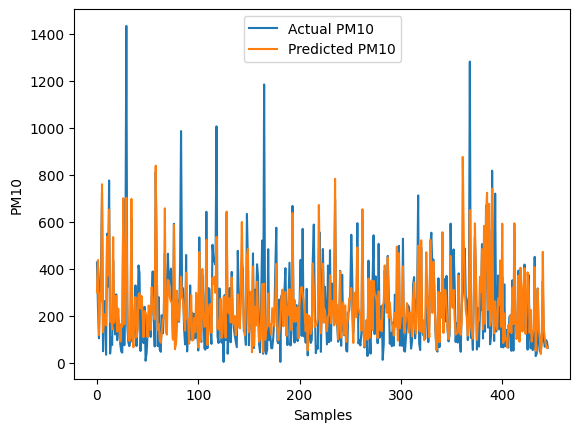

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))

# Remove the first and last columns
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df[['pm25', 'pm10']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test['pm25'].values, label='Actual PM2.5')
plt.plot(y_pred[:,0], label='Predicted PM2.5')
plt.xlabel('Samples')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

plt.plot(y_test['pm10'].values, label='Actual PM10')
plt.plot(y_pred[:,1], label='Predicted PM10')
plt.xlabel('Samples')
plt.ylabel('PM10')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving JanData.xlsx to JanData.xlsx


In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))

# Remove the first and last columns
df = df.iloc[:, 1:-2]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df[['pm25', 'pm10']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
mse, mae = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test['PM2.5'].values, label='Actual PM2.5')
plt.plot(y_pred[:,0], label='Predicted PM2.5')
plt.legend()
plt.show()

plt.plot(y_test['PM10'].values, label='Actual PM10')
plt.plot(y_pred[:,1], label='Predicted PM10')
plt.legend()
plt.show()

Epoch 1/100
56/56 [==============================] - 1s 4ms/step - loss: 46771.7695 - val_loss: 50346.6289
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 44315.0547 - val_loss: 45612.8125
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 37421.9453 - val_loss: 36028.6641
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 28122.6523 - val_loss: 26687.5176
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 20923.4727 - val_loss: 20911.0137
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 17336.2148 - val_loss: 18445.3848
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 15938.4951 - val_loss: 17234.7656
Epoch 8/100
56/56 [==============================] - 0s 2ms/step - loss: 15078.6074 - val_loss: 16382.6611
Epoch 9/100
56/56 [==============================] - 0s 2ms/step - loss: 14447.6123 - val_loss: 15706.7559
Epoch 10/100
56/56 [=================

TypeError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files
uploaded = files.upload()

# Load the Excel file
dataframe = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))

dataframe = dataframe[['pm10', 'pm2.5']]

Best SVM model: SVR(C=10, gamma=0.1)


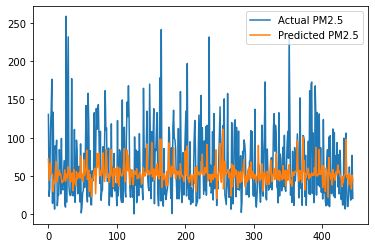

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))


# Remove the first and last columns
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df['pm25'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create an SVM model
svm = SVR(kernel='rbf')

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best SVM model and print its hyperparameters
best_svm = grid_search.best_estimator_
print('Best SVM model:', best_svm)

# Make predictions on the testing set
y_pred = best_svm.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5')
plt.legend()
plt.show()
plt.savefig('pm2.5levels.png')

Best SVM model: SVR(C=10, gamma=0.1)


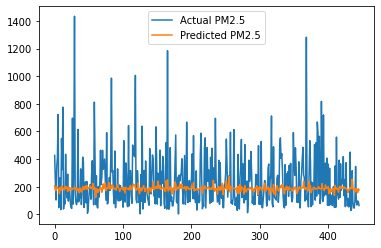

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['JanData.xlsx']))


# Remove the first and last columns
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target variables
X = df.drop(['pm25', 'pm10'], axis=1)
y = df['pm10'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create an SVM model
svm = SVR(kernel='rbf')

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best SVM model and print its hyperparameters
best_svm = grid_search.best_estimator_
print('Best SVM model:', best_svm)

# Make predictions on the testing set
y_pred = best_svm.predict(X_test)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5')
plt.legend()
plt.show()
plt.savefig('pm10levels.png')